<a href="https://colab.research.google.com/github/zeyadahmedh/Exoplanets-Detection-Using-Machine-Learning/blob/main/K2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Configurations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PowerTransformer,label_binarize,RobustScaler
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve,auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve,ConfusionMatrixDisplay,average_precision_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor,VotingClassifier
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
from imblearn.pipeline import Pipeline
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import plotly.express as px
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
import os
from xgboost import XGBClassifier
import time
warnings.filterwarnings('ignore')

# Import Files


In [ ]:
df=pd.read_csv('K2.csv')
df.head()

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,...,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2018-03,2018-02-15
1,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,...,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2016-10,2016-07-28
2,BD+20 594 b,BD+20 594,1,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,...,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2017-03,2018-04-26
3,EPIC 201111557.01,EPIC 201111557,1,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,...,-0.046,9.220,0.019,-0.019,11.3995,0.001307,-0.001307,2018-08-02,2018-08,2018-08-02
4,EPIC 201111557.01,EPIC 201111557,0,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,...,-0.046,9.220,0.019,-0.019,11.3995,0.001307,-0.001307,2018-02-15,2018-03,2018-02-15


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['pl_name', 'hostname', 'default_flag', 'disposition', 'disp_refname',
       'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility',
       'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mas

In [ ]:
drop_cols = [
    "pl_name", "hostname", "disp_refname", "pl_refname", "st_refname", "sy_refname",
    "rowupdate", "pl_pubdate", "releasedate",
    "refname" if "refname" in df.columns else None,  # safety
] + [col for col in df.columns if "err" in col or "lim" in col]
df_new=df.drop(columns=drop_cols,errors='ignore')
df_new.head()

,default_flag,disposition,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_orbper,...,st_metratio,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,0,CONFIRMED,1,1,Transit,2016,K2,Published Confirmed,0,41.688644,...,[Fe/H],4.38000,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,10.849,9.368,10.8644
1,0,CONFIRMED,1,1,Transit,2016,K2,Published Confirmed,0,41.685500,...,[Fe/H],4.50000,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,10.849,9.368,10.8644
2,1,CONFIRMED,1,1,Transit,2016,K2,Published Confirmed,0,41.685500,...,[Fe/H],4.50000,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,10.849,9.368,10.8644
3,1,CANDIDATE,1,0,Transit,2018,K2,Published Candidate,0,2.301830,...,[M/H],4.53679,12h15m23.10s,183.846245,-06d16m05.98s,-6.268329,97.1795,11.727,9.220,11.3995
4,0,CANDIDATE,1,0,Transit,2018,K2,Published Candidate,0,2.302368,...,[Fe/H],4.50000,12h15m23.10s,183.846245,-06d16m05.98s,-6.268329,97.1795,11.727,9.220,11.3995


In [ ]:
df_new.shape

(4004, 35)

In [ ]:
df_new.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,...,st_rad,st_mass,st_met,st_logg,ra,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,3960.000000,820.000000,3173.000000,3173.000000,435.000000,...,3874.000000,2102.000000,1698.000000,2356.000000,4004.000000,4004.000000,3879.000000,3962.000000,3981.000000,3948.000000
mean,0.451049,1.053197,1.126374,2017.547203,0.000250,40.260114,0.104828,8.461578,0.755270,130.182165,...,1.175992,0.873024,-0.029685,4.435907,179.608885,1.285417,391.104905,13.174241,10.709277,12.837391
std,0.497660,0.255672,1.380610,2.031360,0.015803,1342.753644,0.281368,30.017761,2.681487,316.844502,...,2.403903,0.426014,0.228287,0.319714,94.560437,15.158444,543.808755,1.900071,1.410333,1.737748
min,0.000000,1.000000,0.000000,2011.000000,0.000000,0.175660,0.003400,0.406400,0.036257,0.290131,...,0.110000,0.080000,-1.432000,1.773000,8.697142,-30.656190,21.818200,5.840000,3.447000,5.808980
25%,0.000000,1.000000,0.000000,2016.000000,0.000000,2.857987,0.041900,1.800000,0.160586,6.355000,...,0.677000,0.690250,-0.150000,4.290000,127.882912,-11.166116,156.110500,12.059750,9.893000,11.803625
50%,0.000000,1.000000,1.000000,2018.000000,0.000000,6.738783,0.066835,2.600000,0.231422,12.100000,...,0.864093,0.880000,-0.010000,4.490500,172.335371,0.986562,264.780000,12.975500,10.713000,12.670200
75%,1.000000,1.000000,2.000000,2018.000000,0.000000,14.069030,0.104343,6.050000,0.540000,115.000000,...,1.170818,1.027000,0.110000,4.623500,243.450966,15.555438,446.821000,14.314000,11.586000,13.917550
max,1.000000,3.000000,7.000000,2025.000000,1.000000,83830.000000,4.500000,1080.000000,96.400000,4131.790000,...,85.000000,14.336000,0.528000,5.275960,358.639006,28.113580,9319.510000,20.556100,15.740000,20.247800


In [ ]:
df_new.columns

Index(['default_flag', 'disposition', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_orbper',
       'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj',
       'pl_bmassprov', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'ttv_flag',
       'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio',
       'st_logg', 'rastr', 'ra', 'decstr', 'dec', 'sy_dist', 'sy_vmag',
       'sy_kmag', 'sy_gaiamag'],
      dtype='object')

In [ ]:
df_new.describe(include='object')

,disposition,discoverymethod,disc_facility,soltype,pl_bmassprov,st_spectype,st_metratio,rastr,decstr
count,4004,4004,4004,4004,435,437,1695,4004,4004
unique,4,3,10,3,3,82,3,1559,1560
top,CONFIRMED,Transit,K2,Published Candidate,Mass,K3,[Fe/H],22h04m48.74s,-12d01m08.64s
freq,2315,3979,3799,2395,415,21,1411,50,50


In [ ]:
df_new.drop(columns=['rastr','decstr','pl_bmassprov','st_spectype'],inplace=True)
df_new.shape

(4004, 31)

In [ ]:
df_new.nunique()

default_flag          2
disposition           4
sy_snum               3
sy_pnum               8
discoverymethod       3
disc_year            15
disc_facility        10
soltype               3
pl_controv_flag       2
pl_orbper          3828
pl_orbsmax          674
pl_rade            1670
pl_radj            1899
pl_bmasse           363
pl_bmassj           395
pl_orbeccen         144
pl_insol            569
pl_eqt              680
ttv_flag              2
st_teff            1662
st_rad             1838
st_mass             772
st_met              464
st_metratio           3
st_logg            1016
ra                 1560
dec                1560
sy_dist            1502
sy_vmag            1359
sy_kmag            1314
sy_gaiamag         1504
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default_flag     4004 non-null   int64  
 1   disposition      4004 non-null   object 
 2   sy_snum          4004 non-null   int64  
 3   sy_pnum          4004 non-null   int64  
 4   discoverymethod  4004 non-null   object 
 5   disc_year        4004 non-null   int64  
 6   disc_facility    4004 non-null   object 
 7   soltype          4004 non-null   object 
 8   pl_controv_flag  4004 non-null   int64  
 9   pl_orbper        3960 non-null   float64
 10  pl_orbsmax       820 non-null    float64
 11  pl_rade          3173 non-null   float64
 12  pl_radj          3173 non-null   float64
 13  pl_bmasse        435 non-null    float64
 14  pl_bmassj        435 non-null    float64
 15  pl_orbeccen      429 non-null    float64
 16  pl_insol         630 non-null    float64
 17  pl_eqt        

In [ ]:
df_new.isnull().sum()

default_flag          0
disposition           0
sy_snum               0
sy_pnum               0
discoverymethod       0
disc_year             0
disc_facility         0
soltype               0
pl_controv_flag       0
pl_orbper            44
pl_orbsmax         3184
pl_rade             831
pl_radj             831
pl_bmasse          3569
pl_bmassj          3569
pl_orbeccen        3575
pl_insol           3374
pl_eqt             3150
ttv_flag              0
st_teff            1112
st_rad              130
st_mass            1902
st_met             2306
st_metratio        2309
st_logg            1648
ra                    0
dec                   0
sy_dist             125
sy_vmag              42
sy_kmag              23
sy_gaiamag           56
dtype: int64

In [ ]:
for col in df_new.columns:
    if(df_new[col].isnull().sum()<2000):
        df_new[col]=df_new[col].fillna(df_new[col].mode()[0])
    else:
        df_new.drop(columns=[col],inplace=True)

In [ ]:
df_new.isnull().sum()

default_flag       0
disposition        0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_orbper          0
pl_rade            0
pl_radj            0
ttv_flag           0
st_teff            0
st_rad             0
st_mass            0
st_logg            0
ra                 0
dec                0
sy_dist            0
sy_vmag            0
sy_kmag            0
sy_gaiamag         0
dtype: int64

In [ ]:
plt.style.use('dark_background')

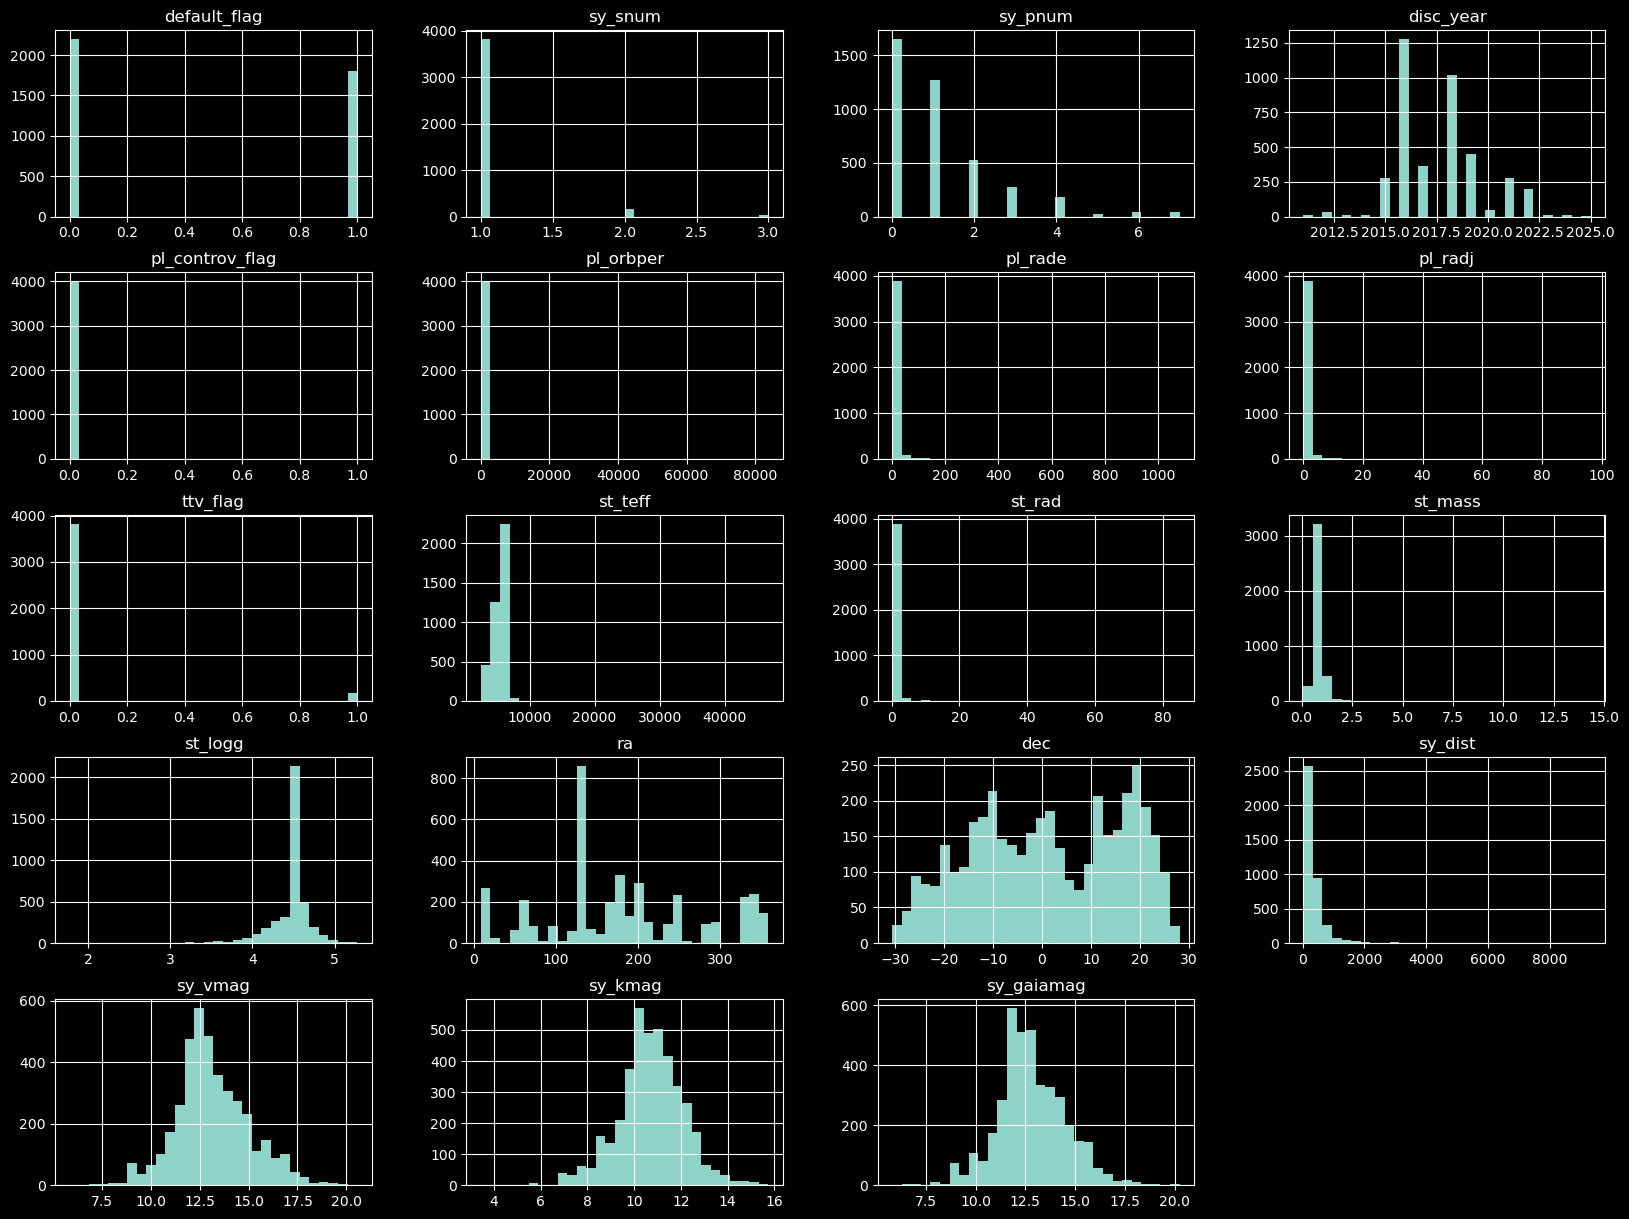

In [ ]:
df_new.hist(bins=30,figsize=(20,15))
plt.show()

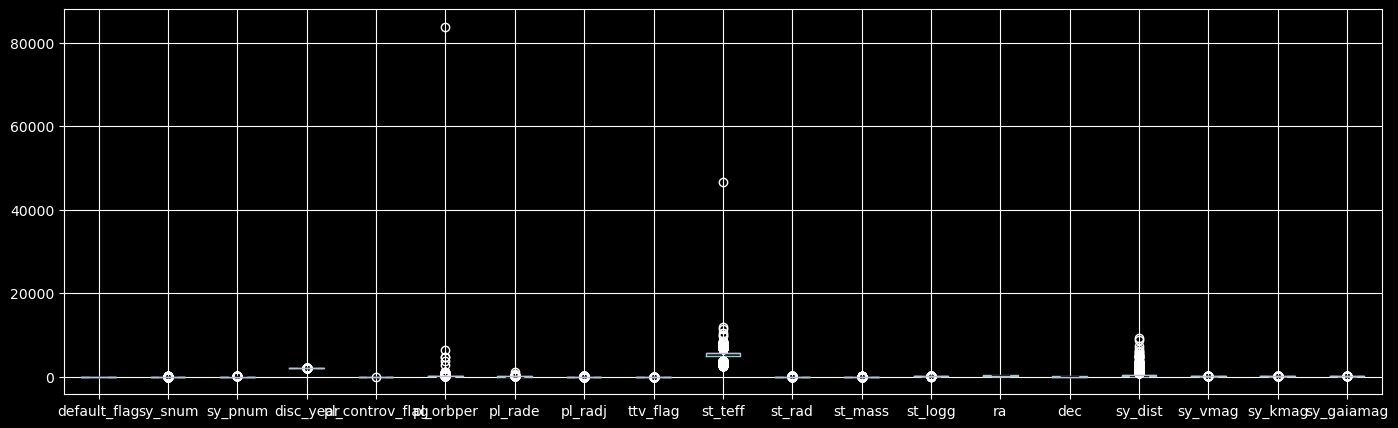

In [ ]:
df_new.boxplot(figsize=(17,5))
plt.show()

In [ ]:
df['disposition'].value_counts()

disposition
CONFIRMED         2315
CANDIDATE         1374
FALSE POSITIVE     293
REFUTED             22
Name: count, dtype: int64

In [ ]:
df_new=df_new[df['disposition']!='REFUTED']

In [ ]:
df_new['disposition'].value_counts()

disposition
CONFIRMED         2315
CANDIDATE         1374
FALSE POSITIVE     293
Name: count, dtype: int64

In [ ]:
df_new.columns

Index(['default_flag', 'disposition', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_orbper',
       'pl_rade', 'pl_radj', 'ttv_flag', 'st_teff', 'st_rad', 'st_mass',
       'st_logg', 'ra', 'dec', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'],
      dtype='object')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3982 entries, 0 to 4003
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default_flag     3982 non-null   int64  
 1   disposition      3982 non-null   object 
 2   sy_snum          3982 non-null   int64  
 3   sy_pnum          3982 non-null   int64  
 4   discoverymethod  3982 non-null   object 
 5   disc_year        3982 non-null   int64  
 6   disc_facility    3982 non-null   object 
 7   soltype          3982 non-null   object 
 8   pl_controv_flag  3982 non-null   int64  
 9   pl_orbper        3982 non-null   float64
 10  pl_rade          3982 non-null   float64
 11  pl_radj          3982 non-null   float64
 12  ttv_flag         3982 non-null   int64  
 13  st_teff          3982 non-null   float64
 14  st_rad           3982 non-null   float64
 15  st_mass          3982 non-null   float64
 16  st_logg          3982 non-null   float64
 17  ra               39

In [ ]:
categorical_cols=['discoverymethod','disc_facility','soltype']
df_new['disposition']=df_new['disposition'].map({'CONFIRMED':2,'CANDIDATE':1,'FALSE POSITIVE':0})
encoder=OneHotEncoder(drop='first',sparse_output=False)
encoded=encoder.fit_transform(df_new[categorical_cols])
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(categorical_cols))

df_encoded=pd.concat([df_new.drop(columns=categorical_cols),encoded_df],axis=1)
df_encoded.head()

,default_flag,disposition,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_rade,pl_radj,ttv_flag,...,disc_facility_HATSouth,disc_facility_K2,disc_facility_La Silla Observatory,disc_facility_Multiple Observatories,disc_facility_Qatar,disc_facility_Roque de los Muchachos Observatory,disc_facility_SuperWASP,disc_facility_SuperWASP-South,soltype_Published Confirmed,soltype_TESS Project Candidate
0,0.0,2.0,1.0,1.0,2016.0,0.0,41.688644,2.355454,0.210139,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,2.0,1.0,1.0,2016.0,0.0,41.685500,2.230000,0.198947,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,2.0,1.0,1.0,2016.0,0.0,41.685500,2.578070,0.230000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,2018.0,0.0,2.301830,1.120000,0.099900,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,2018.0,0.0,2.302368,1.312588,0.120000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.isnull().sum()

default_flag                                        22
disposition                                         22
sy_snum                                             22
sy_pnum                                             22
disc_year                                           22
pl_controv_flag                                     22
pl_orbper                                           22
pl_rade                                             22
pl_radj                                             22
ttv_flag                                            22
st_teff                                             22
st_rad                                              22
st_mass                                             22
st_logg                                             22
ra                                                  22
dec                                                 22
sy_dist                                             22
sy_vmag                                             22
sy_kmag   

In [ ]:
df_encoded=df_encoded.dropna()

In [ ]:
df_encoded.isnull().sum()

default_flag                                        0
disposition                                         0
sy_snum                                             0
sy_pnum                                             0
disc_year                                           0
pl_controv_flag                                     0
pl_orbper                                           0
pl_rade                                             0
pl_radj                                             0
ttv_flag                                            0
st_teff                                             0
st_rad                                              0
st_mass                                             0
st_logg                                             0
ra                                                  0
dec                                                 0
sy_dist                                             0
sy_vmag                                             0
sy_kmag                     

In [ ]:
df_encoded.shape

(3960, 33)

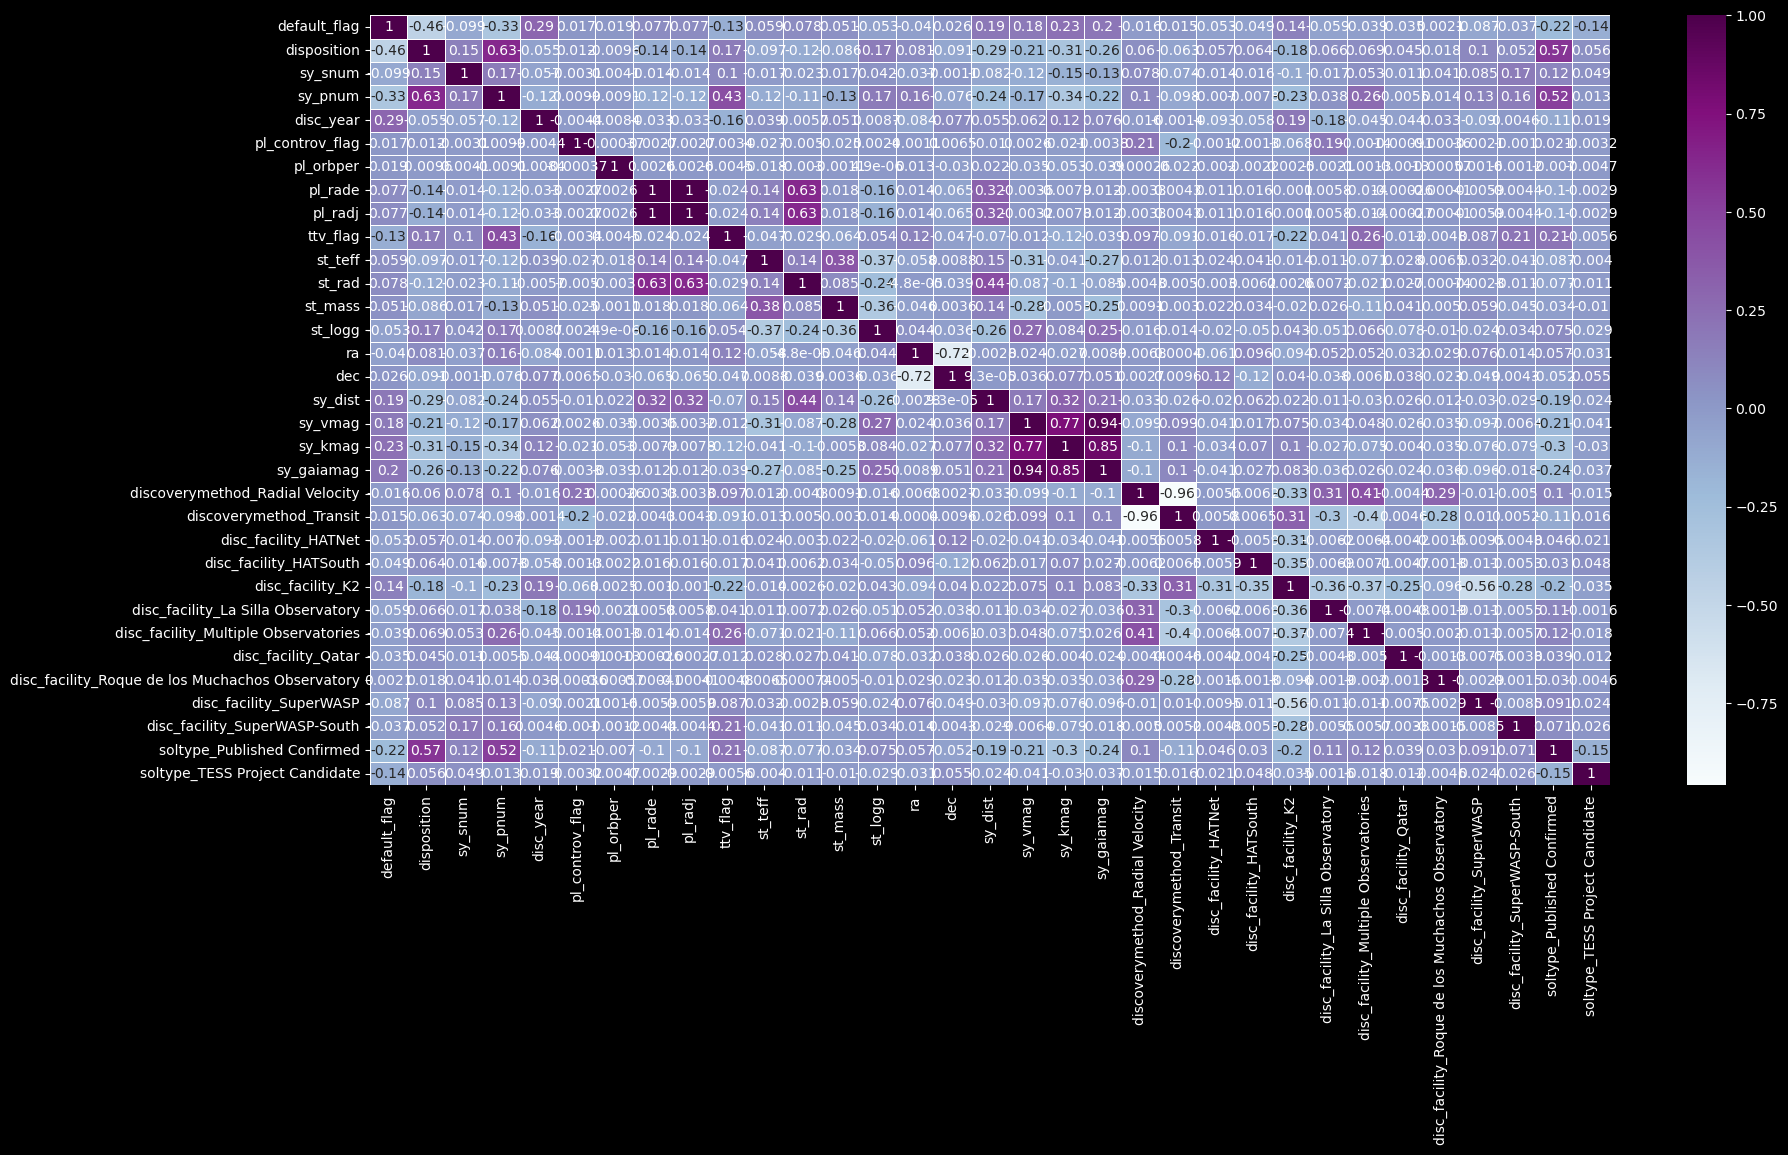

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [ ]:
skewed_cols=['pl_orbper','pl_rade','pl_radj','st_rad','st_mass','sy_dist','st_teff','st_logg']
df_encoded[skewed_cols].skew().sort_values(ascending=False)

pl_orbper    61.462051
pl_rade      22.155888
pl_radj      22.118279
st_mass      21.095391
st_rad       20.663206
st_teff      14.519205
sy_dist       6.928555
st_logg      -2.517099
dtype: float64

In [ ]:
def cap_outliers(df,cols):
    df_capped=df_encoded.copy()
    for col in cols:
        Q1=df_encoded[col].quantile(0.25)
        Q3=df_encoded[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df_capped[col]=np.clip(df_encoded[col],lower,upper)
    return df_capped
df_capped=cap_outliers(df_encoded,skewed_cols)
df_capped

,default_flag,disposition,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_rade,pl_radj,ttv_flag,...,disc_facility_HATSouth,disc_facility_K2,disc_facility_La Silla Observatory,disc_facility_Multiple Observatories,disc_facility_Qatar,disc_facility_Roque de los Muchachos Observatory,disc_facility_SuperWASP,disc_facility_SuperWASP-South,soltype_Published Confirmed,soltype_TESS Project Candidate
0,0.0,2.0,1.0,1.0,2016.0,0.0,30.551682,2.355454,0.210139,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,2.0,1.0,1.0,2016.0,0.0,30.551682,2.230000,0.198947,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,2.0,1.0,1.0,2016.0,0.0,30.551682,2.578070,0.230000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,2018.0,0.0,2.301830,1.120000,0.099900,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,2018.0,0.0,2.302368,1.312588,0.120000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,0.0,2.0,2.0,1.0,2012.0,0.0,4.465635,6.809188,0.608382,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3978,1.0,2.0,2.0,1.0,2012.0,0.0,4.465630,6.809188,0.608382,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3979,0.0,2.0,2.0,1.0,2012.0,0.0,4.466597,2.600000,0.230000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3980,0.0,2.0,2.0,1.0,2012.0,0.0,4.465633,6.809188,0.608382,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print("Before Yeo-Johnson:")
print(df_capped[skewed_cols].skew())

pt=PowerTransformer(method='yeo-johnson')
df_capped[skewed_cols]=pt.fit_transform(df_capped[skewed_cols])

print("\nAfter Yeo-Johnson:")
print(df_capped[skewed_cols].skew())

Before Yeo-Johnson:
pl_orbper    1.120140
pl_rade      0.967868
pl_radj      0.972895
st_rad       0.686521
st_mass      0.480461
sy_dist      1.012709
st_teff     -0.672082
st_logg     -0.181175
dtype: float64

After Yeo-Johnson:
pl_orbper   -0.016167
pl_rade      0.043203
pl_radj      0.170407
st_rad       0.002539
st_mass      0.056407
sy_dist     -0.028160
st_teff     -0.083854
st_logg     -0.021791
dtype: float64


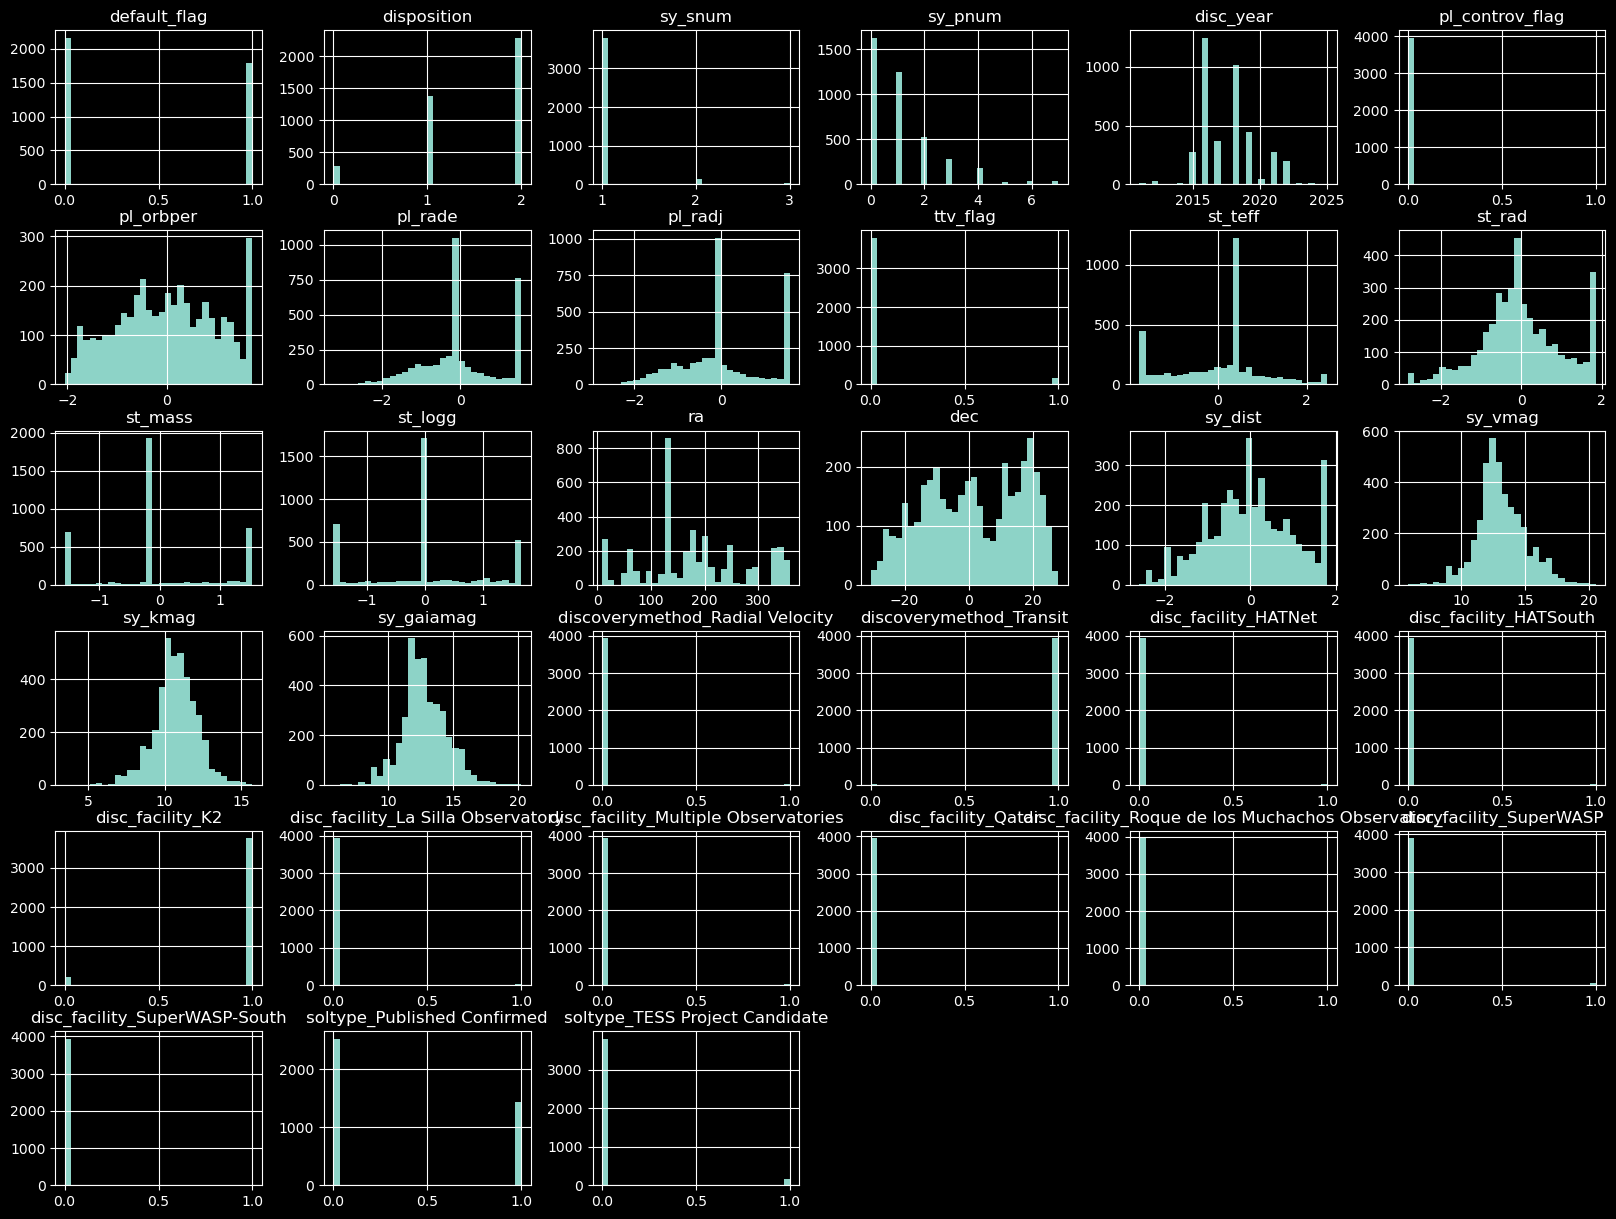

In [ ]:
df_capped.hist(bins=30,figsize=(20,15))
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped[["pl_orbper","pl_rade","pl_radj","st_rad","st_mass","sy_dist"]])
df_scaled = pd.DataFrame(df_scaled, columns=["pl_orbper","pl_rade","pl_radj","st_rad","st_mass","sy_dist"])

# Combine with non-numeric columns if needed
df_final = pd.concat([df_capped.drop(columns=["pl_orbper","pl_rade","pl_radj","st_rad","st_mass","sy_dist"]), df_scaled], axis=1)


In [ ]:
df_final.head()

,default_flag,disposition,sy_snum,sy_pnum,disc_year,pl_controv_flag,ttv_flag,st_teff,st_logg,ra,...,disc_facility_SuperWASP,disc_facility_SuperWASP-South,soltype_Published Confirmed,soltype_TESS Project Candidate,pl_orbper,pl_rade,pl_radj,st_rad,st_mass,sy_dist
0,0.0,2.0,1.0,1.0,2016.0,0.0,0.0,0.570730,-1.120740,53.651123,...,0.0,0.0,1.0,0.0,1.717599,-0.296339,-0.322568,0.148028,1.522023,-0.514029
1,0.0,2.0,1.0,1.0,2016.0,0.0,0.0,0.680945,0.042413,53.651123,...,0.0,0.0,1.0,0.0,1.717599,-0.399574,-0.428704,0.078639,1.491801,-0.514029
2,1.0,2.0,1.0,1.0,2016.0,0.0,0.0,0.680945,0.042413,53.651123,...,0.0,0.0,1.0,0.0,1.717599,-0.126759,-0.145988,0.438867,1.536061,-0.514029
3,1.0,1.0,1.0,0.0,2018.0,0.0,0.0,-0.980377,0.422178,183.846245,...,0.0,0.0,0.0,0.0,-0.951901,-1.683569,-1.629847,-0.358068,-1.576600,-1.231451
4,0.0,1.0,1.0,0.0,2018.0,0.0,0.0,-0.859346,0.042413,183.846245,...,0.0,0.0,0.0,0.0,-0.951722,-1.395510,-1.341659,-0.505419,-0.125838,-1.231451


In [ ]:
max_size = df_final['disposition'].value_counts().max()
dfs = []
df_ready=df_final

In [ ]:
df_ready.isnull().sum()
df_ready.dropna(inplace=True)
df_ready.isnull().sum()

default_flag                                        0
disposition                                         0
sy_snum                                             0
sy_pnum                                             0
disc_year                                           0
pl_controv_flag                                     0
ttv_flag                                            0
st_teff                                             0
st_logg                                             0
ra                                                  0
dec                                                 0
sy_vmag                                             0
sy_kmag                                             0
sy_gaiamag                                          0
discoverymethod_Radial Velocity                     0
discoverymethod_Transit                             0
disc_facility_HATNet                                0
disc_facility_HATSouth                              0
disc_facility_K2            

In [ ]:
x=df_ready.drop(columns=['disposition'])
y=df_ready['disposition']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
print(f'Baseline Logistic Regression Accuracy: {accuracy_score(y_test,y_pred_lr)}')

Baseline Logistic Regression Accuracy: 0.7766497461928934


In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
print(f"Baseline Random Forest Accuracy: {accuracy_score(y_test,y_pred_rf)}")

Baseline Random Forest Accuracy: 0.9517766497461929


In [ ]:
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
y_pred_gb=gb_model.predict(x_test)
print(f"Baseline Gradient Boosting Accuracy: {accuracy_score(y_test,y_pred_gb)}")

Baseline Gradient Boosting Accuracy: 0.950507614213198


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=300, random_state=42)
}

for name, model in models.items():
    start = time.time()
    model.fit(x_train, y_train)  # Use scaled data for LR, original is fine for trees
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    duration = time.time() - start
    report=classification_report(y_test,y_pred)
    results={}
    results[name] = {
        "Accuracy": acc,
        "Time (s)": duration
    }

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction time: {duration:.2f} sec")
    print("Classification Report:")
    print(report)


Logistic Regression
Accuracy: 0.9124
Training + Prediction time: 0.40 sec
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.28      0.40        76
         1.0       0.83      0.95      0.88       275
         2.0       0.98      1.00      0.99       437

    accuracy                           0.91       788
   macro avg       0.85      0.74      0.76       788
weighted avg       0.91      0.91      0.90       788


Random Forest
Accuracy: 0.9530
Training + Prediction time: 0.40 sec
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75        76
         1.0       0.90      0.97      0.94       275
         2.0       0.99      1.00      0.99       437

    accuracy                           0.95       788
   macro avg       0.94      0.86      0.89       788
weighted avg       0.95      0.95      0.95       788


XGBoost
Accuracy: 0.9784
Training + Prediction 

In [ ]:
models_and_grids = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5]}
    ),

    "SVM": (
        SVC(probability=True, random_state=42),
        {'C': [1, 10],
         'kernel': ['linear', 'rbf'],
         'class_weight': [None, 'balanced']}
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'C': [0.1, 1, 10],
         'penalty': ['l2'],
         'class_weight': [None, 'balanced']}
    ),

    "KNN": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}
    )
}

# --------------------------
# 4. Train & evaluate
# --------------------------
results = {}
for name, (model, param_grid) in models_and_grids.items():
    print(f"\n🔍 Training {name}...")
    Xtr, Xte = x_train,x_test
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(Xtr, y_train)
    y_pred = grid.best_estimator_.predict(Xte)

    print(f"✅ Best {name}: {grid.best_params_}")
    print(classification_report(y_test, y_pred, digits=3))
    results[name] = (grid.best_params_, classification_report(y_test, y_pred, digits=3, output_dict=True))


🔍 Training RandomForest...
✅ Best RandomForest: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0      0.958     0.605     0.742        76
         1.0      0.899     0.975     0.935       275
         2.0      0.989     1.000     0.994       437

    accuracy                          0.953       788
   macro avg      0.949     0.860     0.891       788
weighted avg      0.955     0.953     0.949       788


🔍 Training DecisionTree...
✅ Best DecisionTree: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0      0.853     0.763     0.806        76
         1.0      0.936     0.953     0.944       275
         2.0      0.993     1.000     0.997       437

    accuracy                          0.961       788
   macro avg      0.927     0.905     0.915       788
weighted avg      0.960     0.961     0.96

=== Classification Report (SMOTE + Random Forest) ===
              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75        76
         1.0       0.90      0.97      0.94       275
         2.0       0.99      1.00      0.99       437

    accuracy                           0.95       788
   macro avg       0.94      0.86      0.89       788
weighted avg       0.95      0.95      0.95       788

Confusion Matrix:
 [[ 47  29   0]
 [  3 267   5]
 [  0   0 437]]
ROC-AUC (OVR): 0.993567317081092


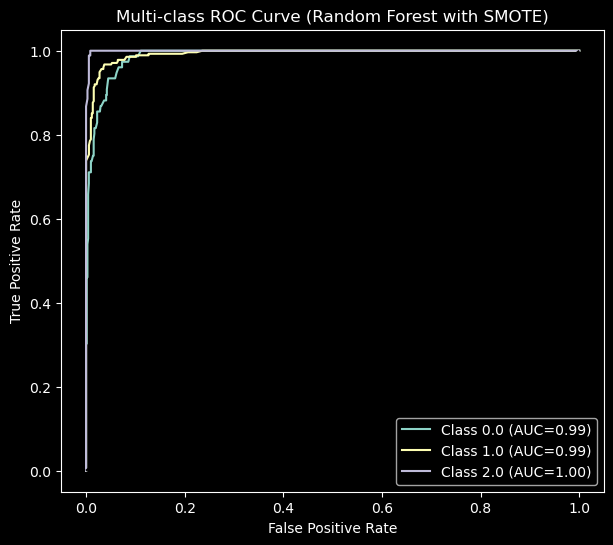

In [ ]:
rf_model=RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
y_proba_rf = rf_model.predict_proba(x_test)
y_pred_rf_train = rf_model.predict(x_train)

print("=== Classification Report (SMOTE + Random Forest) ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
classes = sorted(y_test.unique())  # ensure classes are sorted [0,1,2,...]
y_test_bin = label_binarize(y_test, classes=classes)
roc_auc = roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')
print("ROC-AUC (OVR):", roc_auc)

# --- Plot ROC Curve for each class ---
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc_score(y_test_bin[:, i], y_proba_rf[:, i]):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (Random Forest with SMOTE)")
plt.legend()
plt.show()

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with SMOTE applied only inside each fold
cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy', n_jobs=-1)

print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.95939086 0.97969543 0.95812183 0.96315121 0.96950445]
Mean CV accuracy: 0.9659727552422293
Std deviation: 0.007920911555340148


✅Cross-validation accuracies✅: [0.96349206 0.96825397 0.95079365 0.95396825 0.96666667]
Mean CV accuracy: 0.9606349206349206
Std deviation: 0.00698412698412699

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83        76
         1.0       0.94      0.95      0.95       275
         2.0       0.99      1.00      0.99       437

    accuracy                           0.96       788
   macro avg       0.93      0.91      0.92       788
weighted avg       0.96      0.96      0.96       788

Confusion Matrix:
 [[ 60  16   0]
 [  9 261   5]
 [  0   0 437]]
ROC-AUC (OVR): 0.9939399063699602


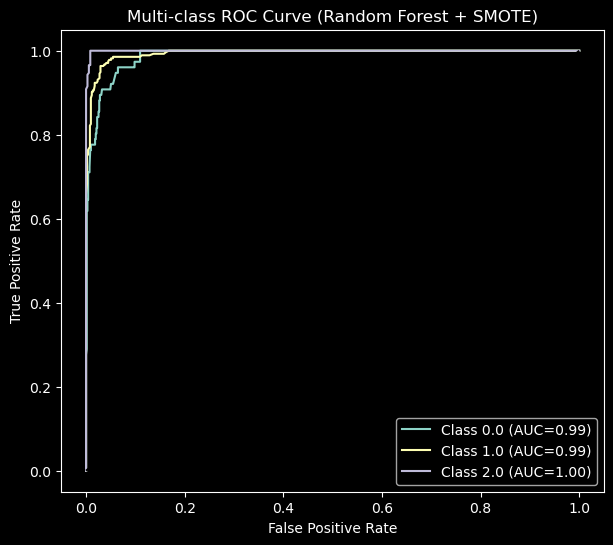

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

# --- Stratified K-Fold cross-validation on training set ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

# --- Train pipeline on full training set ---
pipeline.fit(x_train, y_train)

# --- Predictions on test set ---
y_pred = pipeline.predict(x_test)
y_proba = pipeline.predict_proba(x_test)

# --- Classification report and confusion matrix ---
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Multi-class ROC-AUC ---
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print("ROC-AUC (OVR):", roc_auc)

# --- Plot ROC curve for each class ---
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (Random Forest + SMOTE)")
plt.legend()
plt.show()

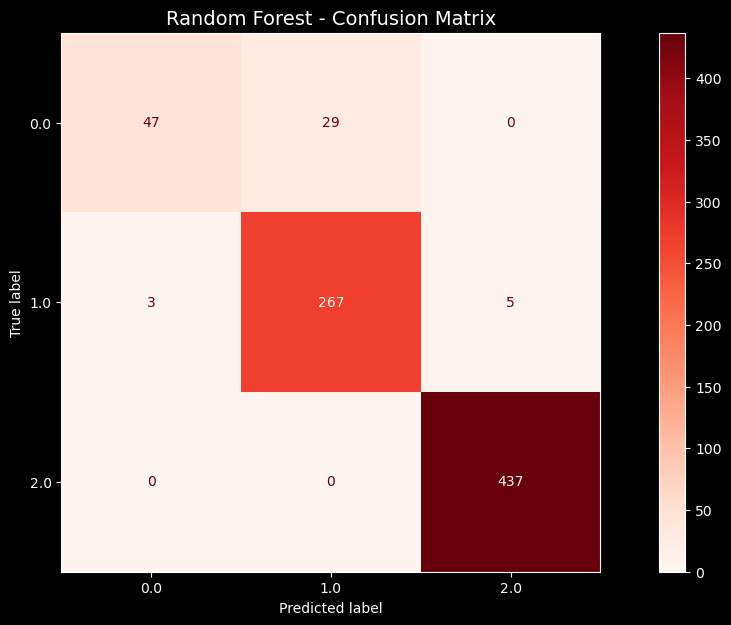

In [ ]:
cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
fig,ax=plt.subplots(figsize=(15,7))
disp.plot(cmap=plt.cm.Reds,ax=ax,values_format='d')
plt.title('Random Forest - Confusion Matrix',fontsize=14)
plt.savefig("conf_matrix_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

                                             Feature    Importance
2                                            sy_pnum  4.240886e-01
24                       soltype_Published Confirmed  1.162406e-01
0                                       default_flag  6.283671e-02
3                                          disc_year  4.083951e-02
31                                           sy_dist  3.929865e-02
26                                         pl_orbper  3.457187e-02
9                                                dec  3.143829e-02
11                                           sy_kmag  3.069474e-02
8                                                 ra  2.767818e-02
6                                            st_teff  2.688331e-02
12                                        sy_gaiamag  2.682992e-02
10                                           sy_vmag  2.626937e-02
29                                            st_rad  2.588813e-02
30                                           st_mass  2.032201

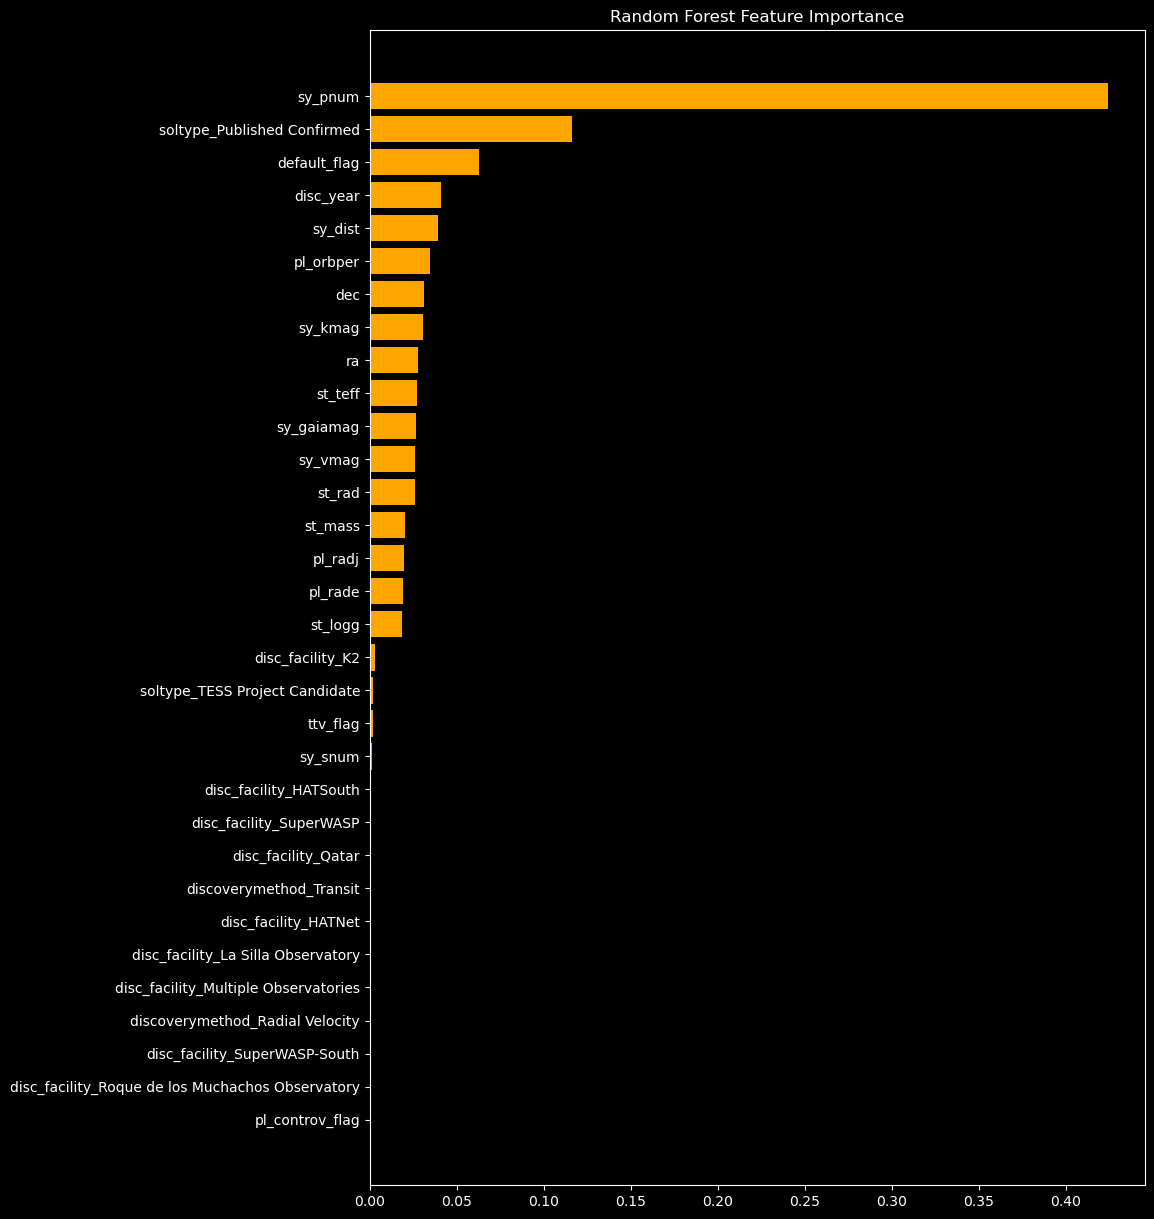

In [ ]:
feature_names=x_train.columns
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

plt.figure(figsize=(10,15))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='orange')
plt.title("Random Forest Feature Importance")
plt.savefig("feature_importance_random_forest.png", dpi=300, bbox_inches="tight")
plt.gca().invert_yaxis()
plt.show()

=== Classification Report (SMOTE + Gradient Boosting) ===
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86        76
         1.0       0.95      0.96      0.95       275
         2.0       0.99      1.00      0.99       437

    accuracy                           0.97       788
   macro avg       0.95      0.93      0.94       788
weighted avg       0.97      0.97      0.97       788

Confusion Matrix:
 [[ 62  14   0]
 [  6 264   5]
 [  0   0 437]]
ROC-AUC (OVR): 0.9947569817899526


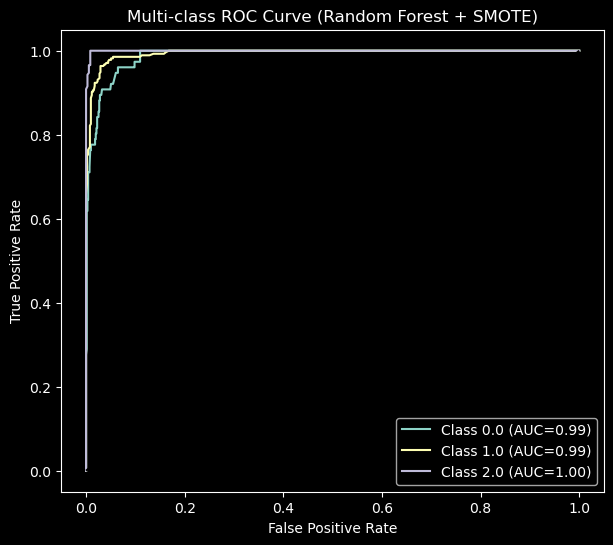

In [ ]:
gb_model_smote = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_model_smote.fit(x_train, y_train)

y_pred_gb = gb_model_smote.predict(x_test)
y_proba_gb = gb_model_smote.predict_proba(x_test)

print("=== Classification Report (SMOTE + Gradient Boosting) ===")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
classes = sorted(y_test.unique())
y_test_bin_gb = label_binarize(y_test, classes=classes)
roc_auc = roc_auc_score(y_test_bin_gb, y_proba_gb, multi_class='ovr')
print("ROC-AUC (OVR):", roc_auc)

# --- Plot ROC curve for each class ---
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (Random Forest + SMOTE)")
plt.legend()
plt.show()

                                             Feature  Importance
2                                            sy_pnum    0.738022
28                                           pl_radj    0.030562
24                       soltype_Published Confirmed    0.028548
3                                          disc_year    0.027207
27                                           pl_rade    0.026432
0                                       default_flag    0.022934
9                                                dec    0.019065
7                                            st_logg    0.016829
8                                                 ra    0.015542
26                                         pl_orbper    0.013399
11                                           sy_kmag    0.010431
30                                           st_mass    0.010213
6                                            st_teff    0.009718
31                                           sy_dist    0.008721
10                       

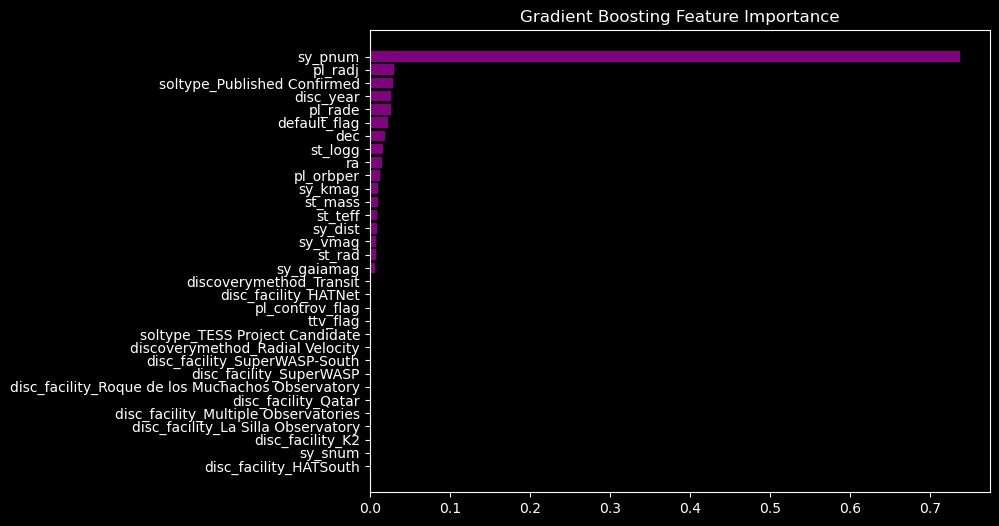

In [ ]:
gb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(gb_importance)

plt.figure(figsize=(8,6))
plt.barh(gb_importance['Feature'], gb_importance['Importance'], color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(gb_model_smote,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.97081218 0.97588832 0.97081218 0.97712834 0.97839898]
Mean CV accuracy: 0.9746080018575972
Std deviation: 0.003199354173888007


In [ ]:
rf_model.fit(x_train,y_train)
gb_model.fit(x_train,y_train)

joblib.dump(rf_model,'Random Forest Model - K2.pkl')
joblib.dump(gb_model,'Gradient Boosting Model - K2.pkl')


['Gradient Boosting Model - K2.pkl']

In [ ]:
rf=joblib.load('Random Forest Model - K2.pkl')
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred))


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83        76
         1.0       0.94      0.95      0.95       275
         2.0       0.99      1.00      0.99       437

    accuracy                           0.96       788
   macro avg       0.93      0.91      0.92       788
weighted avg       0.96      0.96      0.96       788

